**Importing necessary libraries: This section imports the required libraries for data manipulation, visualization, machine learning models, and preprocessing.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler

**Load the data: This section reads the training and testing datasets from CSV files.**

In [ ]:
# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Exploratory Data Analysis (EDA): This part visualizes the distribution of the target variable ('SalePrice') and its relationship with a feature ('GrLivArea').**

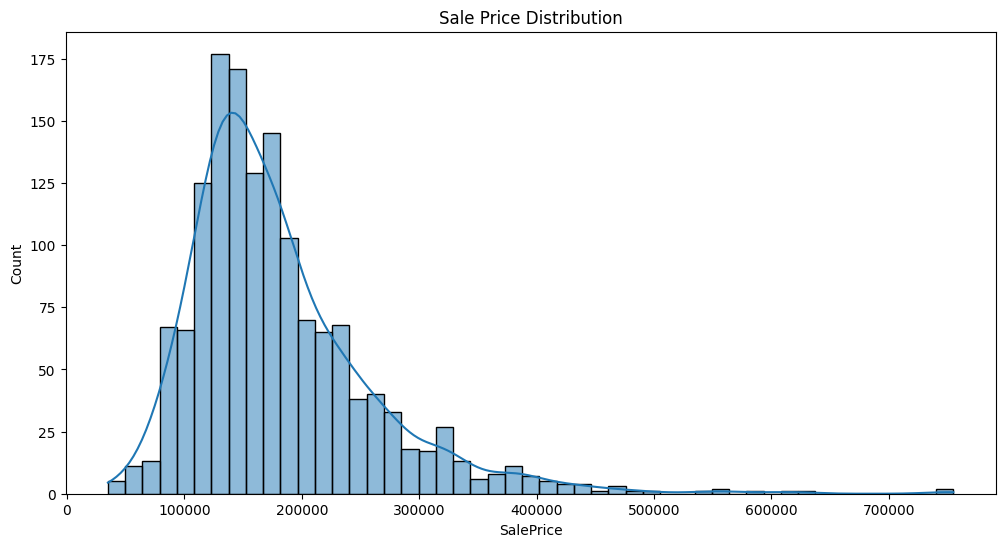

In [ ]:
# EDA
plt.figure(figsize=(12, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

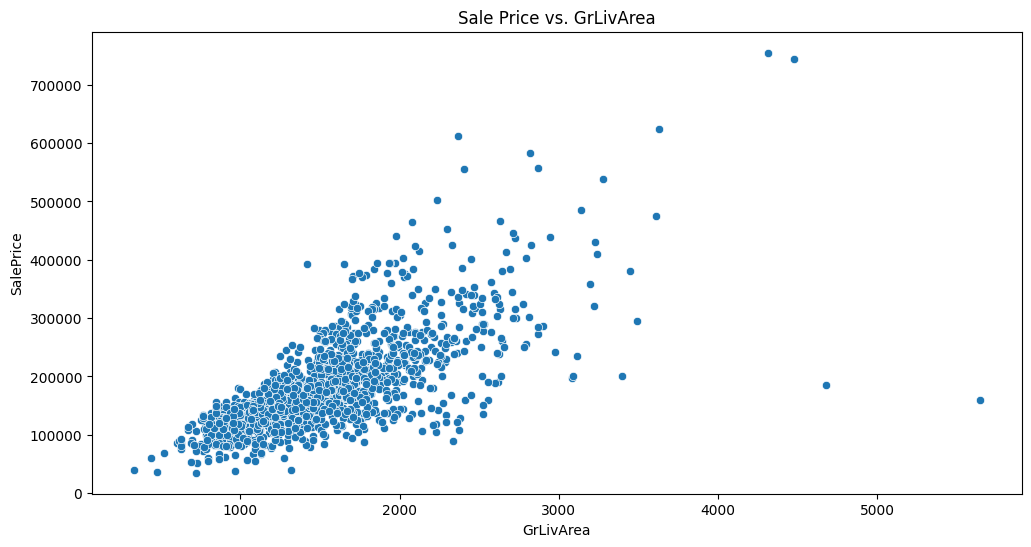

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Sale Price vs. GrLivArea')
plt.show()

**Preprocessing: This section prepares the data for modeling by identifying categorical and numerical columns, creating a preprocessor using ColumnTransformer, and performing preprocessing steps such as imputation and scaling.**

In [ ]:
# Identify categorical and numerical columns
categorical_columns = train.select_dtypes(include=['object']).columns
numerical_columns = train.select_dtypes(exclude=['object']).drop(['Id', 'SalePrice'], axis=1).columns

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', Pipeline(steps=[
            ('impute', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns)])

In [ ]:
# Prepare the data
X_train = train.drop(['Id', 'SalePrice'], axis=1)
y_train = train['SalePrice']
X_test = test.drop(['Id'], axis=1)

In [ ]:
# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
# Feature scaling
scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Modeling: This section defines base models for stacking, sets up a stacking regressor, performs KFold cross-validation, trains the stacking model, generates predictions, and creates a submission file.**

In [ ]:
# Define base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(n_jobs=-1, random_state=42)),
    ('xgb_regressor', XGBRegressor(n_jobs=-1, random_state=42)),
    ('lasso', Lasso(max_iter=10000, random_state=42))
]

In [ ]:
# Set up stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1)

In [ ]:
# Perform KFold cross-validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)
rmse_scores = np.sqrt(-cross_val_score(stacking_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=kf))

In [ ]:
# Print mean and standard deviation of RMSE scores
print(f"KFold Cross-Validation RMSE scores: {rmse_scores}")
print(f"Mean RMSE score: {rmse_scores.mean():.2f}")
print(f"Standard deviation of RMSE scores: {rmse_scores.std():.2f}")

KFold Cross-Validation RMSE scores: [27369.8659262  27070.08361405 45246.70223631 26998.28884535
 21347.56417247]
Mean RMSE score: 29606.50
Standard deviation of RMSE scores: 8137.13


In [ ]:
# Train the stacking model
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('random_forest',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=42)),
                              ('xgb_regressor',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            g...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('lasso',
                               Lasso(max_iter=10000, random_state=42))],
                  final_estimator=Lasso(max_iter=10000, random_state=42),
                  n_jobs=-1)

In [ ]:
# Generate predictions
predictions = stacking_regressor.predict(X_test)

In [ ]:
# Create the submission file
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
submission.to_csv('data_description.csv', index=False)

print("Submission file created.")

Submission file created.



This code is aimed at predicting house prices using machine learning techniques. It follows a typical machine learning workflow, starting with data loading and preprocessing, followed by model training, evaluation, and prediction. Here's a breakdown of the main steps:

1. **Data Loading and Exploration:** The code begins by loading the training and testing datasets and performing exploratory data analysis (EDA) to understand the distribution of the target variable ('SalePrice') and its relationship with other features, such as 'GrLivArea'.

2. **Preprocessing:** Next, the data is preprocessed to prepare it for modeling. This involves identifying categorical and numerical columns, creating a preprocessor using ColumnTransformer, and performing preprocessing steps such as imputation for missing values and scaling using MaxAbsScaler.

3. **Modeling:** The code defines base models for stacking, including RandomForestRegressor, XGBRegressor, and Lasso regression. It then sets up a stacking regressor using StackingRegressor, which combines the predictions of the base models. KFold cross-validation is performed to evaluate the stacking model's performance using Root Mean Squared Error (RMSE). Finally, the stacking model is trained on the entire training dataset, and predictions are generated for the testing dataset.

4. **Submission:** Lastly, the predictions are saved to a CSV file ('data_description.csv') in the required format for submission.

In conclusion, this code demonstrates a comprehensive approach to predicting house prices by combining multiple machine learning models using stacking. It showcases the importance of data preprocessing, model selection, and evaluation in building effective predictive models.